<a href="https://colab.research.google.com/github/clint-bg/tools/blob/main/ConfidenceIntervals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Confidence Intervals
This sheet attempts to explain the difference between **confidence intervals on the mean** of a population (observations from a given process) and **confidence intervals on a model parameter** used to predict a response.

In practical terms, when evaluating observed measurements, I view the confidence interval on the mean of that data as how well I know that average value and thus I could assess if I need to take more data. When looking at a parameter, the confidence interval is related to how impactful the parameter is on the predicted outcome.

-Clint Guymon, BYU Chemical Engineering Department, July 2022

In [16]:
#import needed packages
from ipywidgets import interact
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import numpy as np
import pandas as pd
from scipy.stats import t,f #import Student t distribution methods
from scipy.optimize import minimize #sse minimizer (there are many other options that can be used)

## Confidence Interval on the Mean of Observations
Observations are made ubiquitously with the increasing documentation and recording of those observations driving much of the artificial intelligence that uses those observations to make predictions. 

The confidence interval on the average or mean of those quantified observations can depend on the distribution from which those obserservations are made. The **Central Limit Theorem** establishes that the methods used for statistical conclusions based on the normal distribution can usually be applied to scenarios that may not be generated from a normal distribution. It is assumed to be so in the discussion here.

### Example
Suppose I'm measuring the outlet temperature of a heat exchanger and I have the following data

*  What is the average or mean outlet temperature? 
*  What is the confidence interval on that average outlet temperature?
*  How much better would you know the mean if instead of the relatively small sample of temperatures you took, you took many more? Or, what would your confidence interval on the mean be with many more recorded observations?

In [17]:
initialtemps = [75.2,80.1,76.8,78.4,79.0]

#### Average or Mean Outlet Temperature

In [18]:
meantemperature = np.mean(initialtemps)

#### Confidence Interval on that Mean Outlet Temperature

In [19]:
#first calculate the standard deviation and then the standard error
sdev = np.std(initialtemps)
stderr = sdev/np.sqrt(len(initialtemps))
ci = stderr*t.interval(0.95,len(initialtemps))[1]
#the t.interval yields the cutoff for the 95% confidence interval for the Student t distribution (at high degrees of freedom, it converges to the normal result)

In [20]:
print(f'The average or mean outlet temperature with {len(initialtemps)} recorded observations is {meantemperature:.1f} plus/minus {ci:.1f}.')

The average or mean outlet temperature with 5 recorded observations is 77.9 plus/minus 2.0.


#### Effect of Many More Observations
I will use the statistical measures of the above 5 temperatures to generate many more observations sampled from a normal distribution.

In [21]:
moretemps = t.rvs(1000,size=100)*sdev+meantemperature #1000 degrees of freedom used to give the same result as the normal distribution, also, used the previous mean and stdev to generate the numbers
exampleoutlettemps = np.append(initialtemps,moretemps)
exampleoutlettemps[:50]

array([75.2       , 80.1       , 76.8       , 78.4       , 79.        ,
       80.1553327 , 79.391508  , 78.35808037, 75.27359127, 78.89313244,
       77.26962177, 78.61773065, 77.83153578, 81.26940361, 77.10034739,
       79.63373654, 78.29710209, 76.96967566, 76.48329798, 77.36491843,
       79.34442379, 78.58030954, 77.80782477, 80.35748858, 75.46632818,
       77.33757751, 75.3283229 , 80.0121274 , 78.56346744, 80.87644268,
       78.16572641, 76.24965898, 79.66666799, 80.05567313, 76.8476205 ,
       78.99791203, 77.94599638, 75.04466772, 79.52286584, 76.69962801,
       74.69722416, 79.18003682, 77.1783455 , 75.11739147, 79.44276343,
       78.84771077, 78.35052705, 79.36013629, 76.01790864, 77.91757508])

In [22]:
meantemperatureL = np.mean(exampleoutlettemps)
sdevL = np.std(exampleoutlettemps)
stderrL = sdevL/np.sqrt(len(exampleoutlettemps))
ciL = stderrL*t.interval(0.95,len(exampleoutlettemps))[1]
print(f'Now with a greater amount of samples, the average or mean outlet temperature with {len(exampleoutlettemps)} recorded observations is {meantemperatureL:.1f} plus/minus {ciL:.1f}.')

Now with a greater amount of samples, the average or mean outlet temperature with 105 recorded observations is 78.1 plus/minus 0.3.


Comparing the two results, the average values and the standard deviations are similar but the confidence interval is significantly lower. That is, with more observations, we are much more confident in the mean or average exit temperature from the heat exchanger.

In [23]:
#stats for (5 and 105) samples
print(f'The confidence intervales for 5 and 105 samples, respectively: +/- {ci:.1f},{ciL:.1f}')
print(f'The average temperature for 5 and 105 samples, respectively: {meantemperature:.1f},{meantemperatureL:.1f}')
print(f'The standard deviation for 5 and 105 samples, respectively: {sdev:.1f},{sdevL:.1f}')

The confidence intervales for 5 and 105 samples, respectively: +/- 2.0,0.3
The average temperature for 5 and 105 samples, respectively: 77.9,78.1
The standard deviation for 5 and 105 samples, respectively: 1.7,1.7


Note that the fact that the above average and standard deviation values are similar between 5 and 105 samples is because I set it up that way (the other values were generated from a mean and stdev equal to that for the 5 samples). If the wasn't the case, it's expected that the standard deviation and mean could show a greater difference than what is portrayed above.

#### Interactive Slider Indicating Sampe Size Effect on the Confidence Interval
Below is a slider with associated code demonstrating the above.

In [24]:
@interact(n=(5,500))
def cifn(n):
  othertemps = t.rvs(1000,size=n-5)*np.std(initialtemps)+meantemperature #1000 degrees of freedom used to give the same result as the normal distribution, also, used the previous mean and stdev to generate the numbers
  temps = np.append(initialtemps,othertemps)
  sdev = np.std(temps)
  stderr = sdev/np.sqrt(len(temps))
  ci = stderr*t.interval(0.95,len(temps))[1]
  print(f'The mean is {np.mean(temps):.1f} +/- {ci:.1f} with standard deviation of {sdev:.1f}')

interactive(children=(IntSlider(value=252, description='n', max=500, min=5), Output()), _dom_classes=('widget-…

### Standard Error versus Standard Deviation
As exhibited in the above example, **the standard deviation may not indicate how well you know the average** or mean temperature (but it can indicate the distribution of values observed). The standard error on the other hand, is a measure of how well you know the mean and is simply the ratio of the standard deviation and the sqrt of the number of observations.

I have been confused by these two values in the past (and sometimes in the present). When calculating the confidence interval on the mean of observations, make sure to either use the standard error with the typical 1.96 or 2 value or divide the standard deviation by the sqrt of the number of observations before multiplying by the 1.96 or 2 factor to get confidence intervals.

### Normal versus the Student t Distribution
The normal distrution relates the probability of an observational value given the mean and standard deviation from that population. When the standard deviation is well known, the normal distribution parameters are usually used in calculating the confidence intervals. For example, for a two-sided tail, a 95% confidence interval corresponds to a normalized value of 1.96 (or 2) that is typically used. 

However, if the standard deviation isn't well known, the Student t distribution is used to account for that uncertainty. It accounts for the number of degrees of freedom (or observations) to yield a value to use for the confidence interval (instead of the typical 1.96 or 2 used for the two-tail 95% C.I.).

Below is an interactive slider that can be used to compare the two distributions.

In [25]:
#Create an interactive plot (not seen in GitHub but can be manipulated in Google Colab)
@interact(mean=(60,80),standarddev=(0.5,1.5),df=(1,10))
def normalplot(mean,standarddev,df):
  xlin =  (np.linspace(mean-7*standarddev, mean+7*standarddev, 200)-mean)/standarddev
  ylin = t.pdf(xlin,1000)/standarddev
  ylin2 = t.pdf(xlin,df)/standarddev
  plt.plot(xlin*standarddev+mean, ylin, 'r', label='Normal Distribution'); 
  plt.plot(xlin*standarddev+mean, ylin2, 'b', label='Student t Distribution');
  plt.xlabel("mean"); plt.ylabel("probability")
  plt.xlim(50,90); plt.ylim(0,1)
  plt.legend(); plt.show()


interactive(children=(IntSlider(value=70, description='mean', max=80, min=60), FloatSlider(value=1.0, descript…

## Confidence Interval on a Parameter in a Model
**A model could be a simple line relating one independent variable to a dependent variable**. For example, the concentration of a species can linearly relate to the rate of a first order reaction at a constant temperature.  Or, a model could yield a non-linear relationship (for example a second order reaction). 

Additionally, a model may have several parameters, for example the Arrhenius parameters in a second order reaction. Or, for a machine learning application, models can have millions of parameters.

### Obtain the Parameter Value(s)
A curve fit by minimizing the sum of the squared errors is typically completed to determine the parameter value(s). Once the parameter value is determined, it can be valuable to detemine the uncertainty in that parameter value. 

First we'll set up a generic example to find the a linear parameter by minimizing the sum of the squared errors using scipy's minimize (we could use gekko as well).

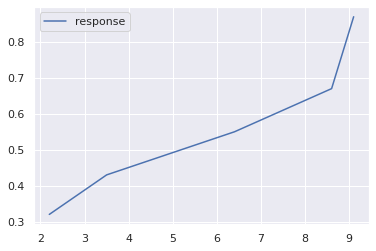

In [26]:
data = pd.DataFrame({'response':[0.32,0.43,0.55,0.67,0.87]}, index=[2.2,3.5,6.4,8.6,9.1])
data.plot()

In [27]:
def linearSSE(x):
  #calculate sum of squared errors for a linear fit
  prediction = data.index*x[1] + x[0]
  sse = ((prediction - data['response'])**2).sum()
  return sse

In [46]:
optimalparametervalues =  minimize(linearSSE,[1,1]).x
optimalparametervalues

array([0.17053879, 0.06668812])

### Obtain limits around each Parameter Value 
Limits around each parameter value are found that gives a SSE within the value that is not statistically different per the F test:
$\frac{SSE(\theta)-SSE(\theta^*)}{SSE(\theta^*)} \le \frac{n}{n-p}\cdot F(\alpha,p,n-p)$

where the $SSE$ is the sum of squared error given a set a parameter values $\theta$, $\theta^*$ is the parameter values that give the lowest $SSE$. $n$ is the number of data points, $p$ the number of parameters, and F is the scipy.f.isf function that specifies the important value that indicates whether one parameters set is significantly different from another. See also the very helpful info and demonstrations on AP Monitor: https://apmonitor.com/che263/index.php/Main/PythonRegressionStatistics.

In [45]:
f.isf(0.05,2,1)

199.49999999999972

In [ ]:
optimalSSE = minimize(linearSSE,[1,1]).fun
#setup function to obtain confidence limits based on the F-test

In [ ]:
optimalSSE

0.016986649467982638

In [ ]:
minimize(linearSSE,[1,1]).fun

0.016986649467982638

In [ ]:
linearSSE([0.17,0.067])

0.01699898

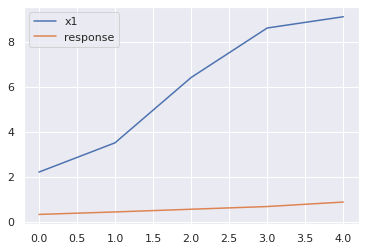

In [ ]:
data.plot()